<a href="https://colab.research.google.com/github/mshah100/GRAPHQL-ODDESEY-LIFT-OFF-PART1/blob/main/Capstone_MonishaShah_Music_Recommendation_System_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Music Recommendation System**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?
 1.  There is a vast amount of content available on the sites and key is to present presonalized recommendations for users based on their previous preferences and also what other users with a similar profile like.

 2.  The revenue that the sites generate is based on how much time the user spends on the site and for how long they have listened to a song.

### **The objective:**

 - What is the intended goal?


1.   Create a pertinent recommendation list of songs for the users to choose from based on their previous preferences and preferences of other users similar to user or other recommendation techniques like SVD, Co-clustering, Content based or a Hybrid one.

2. Recommendation Systems are one of the most profitable applications of machine learning in the world today.


### **The key questions:**

- What are the key questions that need to be answered?

1.  Suggest the top 10 songs to the user based on the liklihodd of the user listening to the songs.

2.  Provide personalized suggestions to improve customer experience as there is a vast amount of data that is likely doubling every 2 years.

- What is it that we are trying to solve using data science?
1.  Using the song and the interaction data provided, build a recommendation system that engages the users with the relevant recommendation of songs.
2.  This requires exploratory data analysis to impute, drop rows and further data analysis to merge the 2 datasets.  Eventually using rating based, collaborative fitering or / and Single Value Decomposition or co-clustering, content-based etc to provide the most relevant recommendations based on model prediction.  
3. Hybrid recommendation system works best in providing the optimum recommendations.

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# Installing the surprise library
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357247 sha256=b95a278dd095e0b21b3677cec845a1d3445891eaa9adce067728d89e5c3f45b1
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [4]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

from sklearn.preprocessing import LabelEncoder  # Label Encoding module that is used to convert categorical columns into numerical ones

# To compute the accuracy of models
from surprise import accuracy

# Class to parse a file containing ratings, data should be in structure - user; item; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Import mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, classification_report
# imported confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, classification_report for the deep learning model metric

# Import TensorFlow for deep learning tasks
import tensorflow as tf

# importing library for text preprocessing
import re

# Import modules from the Hugging Face transformers library
from transformers import BertTokenizer, TFBertForSequenceClassification

### **Load the dataset**

In [5]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/MITAppliedDatascience/CapstoneProject/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/MITAppliedDatascience/CapstoneProject/song_data.csv')

### **Understanding the data by viewing a few observations**

In [6]:
# Display first 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [7]:
# Display first 10 records of song_df data
song_df.head(10)


,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [8]:
# Display info of count_df
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [9]:
# Display info of song_df
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:


1.   The count interaction data has 2000000 rows with 4 columns and the user_id and song_id are of type object.
2.  In the count data the first column is Unnamed and cannot be used in the analysis.
3.   Song data has 1000000 rows with 5 columns with the columns song_id, tile, release and artist_name being objects.




In [10]:
# Left merge count_df and song_df on "song_id". Drop duplicates from song_df data simultaneously
df = count_df.merge(song_df, on='song_id', how='left').drop_duplicates().dropna()

# Drop the column 'Unnamed: 0'
df.drop('Unnamed: 0', axis=1, inplace=True)

## Name the obtained dataframe as "df"

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [11]:
# Apply label encoding for "user_id" and "song_id" to encode them to numeric features
from sklearn.preprocessing import LabelEncoder
data=df[['user_id','song_id']].apply(LabelEncoder().fit_transform)
df['user_id'] = data['user_id']
df['song_id'] = data['song_id']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2054534 entries, 0 to 2086945
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   song_id      int64 
 2   play_count   int64 
 3   title        object
 4   release      object
 5   artist_name  object
 6   year         int64 
dtypes: int64(4), object(3)
memory usage: 125.4+ MB


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [12]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [13]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [14]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [15]:
# We want our song to be listened by atleast 120 users to be considred
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [16]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_initial = df_final.copy()
df_final = df_final[df_final.play_count<=5]

In [17]:
# Check the shape of the data
df_final.shape

(138301, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [18]:
# Display total number of unique user_id
df_final['user_id'].nunique()

3337

Total number of unique song id

In [19]:
# Display total number of unique song_id
df_final['song_id'].nunique()

620

Total number of unique artists

In [20]:
# Display total number of unique artists
df_final['artist_name'].nunique()

247

#### **Observations and Insights:__________**


1.   Only users who have listened to 90 songs are included in the analysis
2.   Also songs that have been listened by 120 users are included.
3.   Songs which have a rating of less than or equal to 5 are included in teh dataset, this accounts for 90% of the songs.
4.  The number of unique users in the dataframe are 3337
5.  The number of unique songs int eh dataframe are 620
6.  The number of unique artists in the dataset is 247.



### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [21]:
df_final.groupby(['song_id']).count()['play_count'].sort_values(ascending=False).reset_index().head(5)

,song_id,play_count
0,8582,1602
1,6293,1264
2,3567,982
3,4270,960
4,1286,920


Most interacted users

In [22]:
df_final.groupby(['user_id'], as_index=True).count()['play_count'].sort_values(ascending=False).reset_index().head(5)

,user_id,play_count
0,61472,282
1,15733,240
2,37049,237
3,9570,204
4,10763,199


#### **Observations and Insights:_______**

1.   Most intereacted song is 8582 with an aggregated play_count value 1602.
2.   Most interacted user is 61472 with an aggregated play_count value of 245



Songs released on yearly basis

In [23]:
# Find out the number of songs released in a year, use the songs_df
  # Hint: Use groupby function on the 'year' column
#Removing rows where the year is set to zero
df_final = df_final[df_final.year>0]
song_df = song_df[song_df.year>0]
song_df.groupby('year').count()['song_id'].sort_values(ascending=False).reset_index()



,year,song_id
0,2007,39414
1,2006,37546
2,2005,34960
3,2008,34770
4,2009,31051
...,...,...
84,1925,7
85,1922,6
86,1933,6
87,1924,5


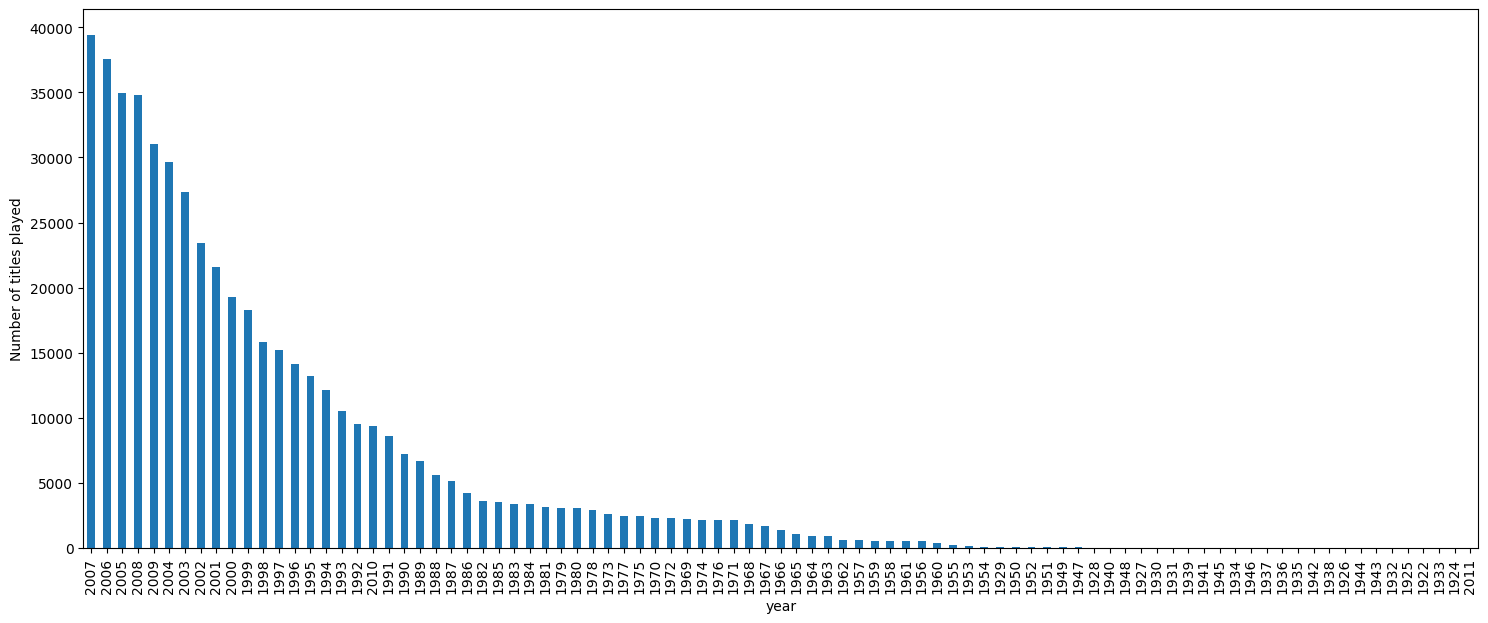

In [24]:
# Create a barplot plot with y label as "number of titles played" and x -axis year

# Set the figure size
plt.figure(figsize=(18,7))

# Set the x label of the plot
plt.xlabel('Year')

# Set the y label of the plot
plt.ylabel('Number of titles played')
plt.xticks(rotation='vertical')
# Show the plot
song_df.groupby(['year']).count()['song_id'].sort_values(ascending=False).plot(kind='bar')
plt.show()

#### **Observations and Insights:__________**

1.  Eliminating the row were the year was set to 0 from the data.
2.  Maximum titles were played in the year 2007.  
3.  In 2011 only one title was played.



**Think About It:** What other insights can be drawn using exploratory data analysis?

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [25]:
## Calculating average play_count
  # Hint: Use groupby function on the song_id column
# apply the same precision to all numeric types
pd.set_option('display.precision', 2)
df_avg_play_count = df_final.groupby(['song_id'])['play_count'].mean().reset_index()
df_avg_play_count.columns = ['song_id', 'average_play_count']
df_avg_play_count.sort_values('average_play_count', ascending=False, inplace=True)
df_avg_play_count

,song_id,average_play_count
384,7224,3.37
451,8324,2.61
526,9942,2.48
459,8483,2.31
294,5531,2.31
...,...,...
123,2207,1.29
17,252,1.29
310,5787,1.28
448,8282,1.25


In [26]:

# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column
df_song_frequency = df_final.groupby(['song_id'])['play_count'].sum().reset_index()
df_song_frequency.columns = ['song_id', 'play_frequency']
df_song_frequency.sort_values(by='play_frequency', ascending=False)

,song_id,play_frequency
462,8582,3126
341,6293,2216
72,1286,1774
419,7796,1660
19,310,1580
...,...,...
123,2207,155
448,8282,148
394,7388,127
50,883,121


In [27]:
df_avg_play_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 384 to 130
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song_id             530 non-null    int64  
 1   average_play_count  530 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 12.4 KB


In [28]:
# Making a dataframe with the average_count and play_freq
df_avg_count_play_freq = df_avg_play_count.merge(df_song_frequency, on='song_id', how='inner').sort_values(by='song_id', ascending=False)


# Let us see the first five records of the final_play dataset
df_avg_count_play_freq.head(5)

,song_id,average_play_count,play_frequency
514,9989,1.34,163
46,9981,1.90,306
280,9960,1.60,227
2,9942,2.48,395
168,9931,1.72,987


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [29]:
# Build the function to find top n songs
def top_n_play_song(data, n, min_interaction=2):

    # Finding songs with minimum number of interactions
    recommendations = data[data['average_play_count'] > min_interaction]

    # Sorting values w.r.t. average rating
    recommendations = recommendations.sort_values(by='song_id', ascending=False)

    return recommendations.index[:n]

In [30]:
# Recommend top 10 songs using the function defined above
recommendations = top_n_play_song(df_avg_count_play_freq, 10, 1)
recommendations

Index([514, 46, 280, 2, 168, 491, 428, 384, 350, 393], dtype='int64')

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [31]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise

In [32]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering


### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [33]:
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

You will also notice here that we read the dataset by providing a scale of ratings. However, as you would know, we do not have ratings data of the songs. In this case, we are going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song

In [34]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)
reader = Reader(rating_scale = (0, 5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size = 0.3, random_state = 42)

**Think About It:** How changing the test size would change the results and outputs?

In [35]:
# Build the default user-user-similarity model


# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_options = {'name': 'cosine',
               'user_based': True}
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_user_user)

RMSE: 1.0627
Precision:  0.396
Recall:  0.652
F_1 score:  0.493


**Observations and Insights:_________**



1.   We have calculated RMSE to check how far the overall predicted ratings are from the actual ratings.
2.  Intuition of Recall: We are getting a recall of ~0.69, which means out of all the relevant songs 69% are recommended.
3.  Intuition of Precision: We are getting a precision of ~ 0.4, which means out of all the recommended songs 40% are relevant.
4.  Here F_1 score of the baseline model is ~0.50. It indicates that mostly recommended songs were relevant.
5.  We will try to improve this later by using GridSearchCV by tuning different hyperparameters of this algorithm.




In [36]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
sim_user_user.predict(47786, 9081, r_ui = 4, verbose = True)

user: 47786      item: 9081       r_ui = 4.00   est = 1.85   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=47786, iid=9081, r_ui=4, est=1.854493499320358, details={'actual_k': 40, 'was_impossible': False})

In [37]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user
sim_user_user.predict(47786, 39414, r_ui = 4, verbose = True)



user: 47786      item: 39414      r_ui = 4.00   est = 1.68   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=47786, iid=39414, r_ui=4, est=1.6781304785706292, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:_________**


The estimated prediction for the song to be played when the sample user had listened to any songs is 1.91 with actual_k set to 30.


The estimated prediction when the song was not listened by the user is
1.68, even though the reason is user and /or item is unknown.  This prediction is based off user-user similarity.





Now, let's try to tune the model and see if we can improve the model performance.

In [38]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [30, 40, 50], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [True]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0003095400499247
{'k': 50, 'min_k': 9, 'sim_options': {'name': 'msd', 'user_based': True}}


In [39]:
# Train the best model found in above gridsearch
# Using the similarity measure for user-user collaborative filtering
sim_options = {'name': 'msd',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 50, min_k = 9, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 0.9992
Precision:  0.437
Recall:  0.58
F_1 score:  0.498


**Observations and Insights:_________**


We can see from above that after tuning hyperparameters, F_1 score of the tuned model has increased slightly to ~0.51 in comparison to the baseline using cosine similarity.

Along with this, the RMSE of the model has gone down moe closer to ~1 and Precision is ~0.44. Hence, we can say that the model performance has improved slightly after hyperparameter tuning compared to the base model.






In [40]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.61   {'actual_k': 50, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.6128543732746388, details={'actual_k': 50, 'was_impossible': False})

In [41]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(6958, 545, r_ui = 2, verbose = True)

user: 6958       item: 545        r_ui = 2.00   est = 1.44   {'actual_k': 48, 'was_impossible': False}


Prediction(uid=6958, iid=545, r_ui=2, est=1.4429506246281973, details={'actual_k': 48, 'was_impossible': False})

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

**Observations and Insights:**

*   For the user 6958 and song_id 1671 as per the data the play_count is 2 and the estimated prediction is 1.67 which is quite close to the predicted play_count when rounded up.
*   The song_id 545 is not on the playlist of the user 6958 however the predicted play_count is ~ 1.44



In [42]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(1671, k = 5)

[9, 22, 47, 54, 55]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [43]:
#Creating a grouped dataframe with user_id, song_id and sum of play_count
grouped_df_final = df_final.groupby(['user_id', 'song_id']).sum()['play_count'].reset_index()
grouped_df_final.columns = ['user_id', 'song_id', 'play_count']
grouped_df_final.head(10)

,user_id,song_id,play_count
0,11,5158,2
1,11,8882,1
2,17,703,2
3,17,1050,1
4,17,1344,1
5,17,1348,1
6,17,1480,1
7,17,1756,1
8,17,2514,1
9,17,2716,1


In [44]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended song ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those song ids which the user_id has not played yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song ids which user_id has not interacted yet
    for song_id in non_interacted_songs:

        # Predicting the users for those non played song ids by this user
        est = algo.predict(user_id, song_id).est

        # Appending the predicted play_counts
        recommendations.append((song_id, est))

    # Sorting the predicted play_counts in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    # Returing top n highest predicted play_count songs for this user
    return recommendations[:top_n]


In [45]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(grouped_df_final, 6958, 5, sim_user_user_optimized)
recommendations

[(7224, 3.261078368477811),
 (114, 2.791259105098856),
 (5531, 2.6),
 (4831, 2.5250971580704054),
 (6860, 2.4727283958243236)]

In [46]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
recommendations_df = pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])


**Observations and Insights:______________**


*   The top 5 recommended songs for the user 6958 are being predicted using the user-user optimized algorithm.  The predicted playcounts are estimated and returned based on user-user similarity.




### Correcting the play_counts and Ranking the above songs

In [47]:
def ranking_songs(recommendations, playing_count):
  # Sort the songs based on play counts
 # Sort the songs based on play counts
    # Convert song IDs in recommendations to the same data type as in playing_count
  recommendations_song_ids = recommendations.iloc[:, 0].astype(playing_count['song_id'].dtype).tolist()

  # Sort the songs based on play counts, ensuring only available song IDs are used
  ranked_songs = playing_count.loc[playing_count['song_id'].isin(recommendations_song_ids)].sort_values('average_play_count', ascending=False)[['song_id', 'average_play_count']].reset_index()
  # Assign the correct number of column names, including the 'index' column
  ranked_songs.columns = ['index', 'song_id', 'average_play_count'] # Include 'index' in the column names

  # Drop the 'index' column if it's not needed
  ranked_songs = ranked_songs.drop('index', axis=1)

  # Merge with the recommended songs to get predicted play_counts
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['average_play_count'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending = False)

  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [48]:
# Applying the ranking_songs function on the final_play data
ranked_songs = ranking_songs(recommendations_df, df_avg_play_count)
ranked_songs

,song_id,average_play_count,predicted_play_count,corrected_play_count
0,7224,3.37,3.26,2.72
4,114,1.87,2.79,2.06
1,5531,2.31,2.60,1.94
2,4831,2.19,2.53,1.85
3,6860,2.18,2.47,1.80


**Observations and Insights:______________**

1.  The corrected play count takes into account the number of values and 1/np.sqrt(n) is subtracted as that is what has been observed as the standard correction.  As per the Central limit theorem, the estimated error is 1/sqrt(n).




### Item Item Similarity-based collaborative filtering recommendation systems

In [49]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# The KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the testset
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)


RMSE: 1.0099
Precision:  0.298
Recall:  0.538
F_1 score:  0.384


**Observations and Insights:______________**

F_1 score of the baseline model is ~0.39. We will have to improve this by tuning different hyperparameters of this algorithm using GridSearchCV.

In [50]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) listened to by the user
sim_item_item.predict(6958, 1671, r_ui = 4, verbose = True)

user: 6958       item: 1671       r_ui = 4.00   est = 1.33   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=4, est=1.3278195552931915, details={'actual_k': 24, 'was_impossible': False})

In [51]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(514, 1671, r_ui = 4, verbose = True)

user: 514        item: 1671       r_ui = 4.00   est = 1.68   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=514, iid=1671, r_ui=4, est=1.6781304785706292, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:______________**



1.   For user 6858 and the song 1671 the prediction is ~1.37 was ~1.67 in the user-user collaborative model for the same user and item.
2. The prediction for the same song and user 514 is ~1.68, using item - item similarity algorithm.

This is using item item cosine similarity alogirthm prediction.



In [52]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)


# Fitting the data
gs.fit(data)

# Find the best RMSE score
print('best rsme score =', gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score


# Print the combination of parameters that gave the best RMSE score
print('best params to get the rsme =', gs.best_params['rmse'])



best rsme score = 1.0004492824063458
best params to get the rsme = {'k': 30, 'min_k': 6, 'sim_options': {'name': 'msd', 'user_based': False}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [53]:
# Apply the best model found in the grid search
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'msd',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 3, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0019
Precision:  0.331
Recall:  0.525
F_1 score:  0.406


**Observations and Insights:______________**


1.   Once the grid search is complete, the optimal values for the hyperparameters are found to be MSD based similarity for item based collaborative filtering.
2.  We can observe that after hyperparameters tuning, F1 score of the model has improved to be ~0.41,
3.  The RMSE of the model is ~1 and Precision is improved to ~0.33
4.  Model performance has improved after hyperparameter tuning.



In [54]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958, 1671, r_ui = 4, verbose = True)

user: 6958       item: 1671       r_ui = 4.00   est = 1.28   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=4, est=1.2813143973182326, details={'actual_k': 24, 'was_impossible': False})

In [55]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not listened to by the user
sim_item_item_optimized.predict(6958, 3232, r_ui = 4, verbose = True)

user: 6958       item: 3232       r_ui = 4.00   est = 1.41   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=4, est=1.414815938837415, details={'actual_k': 24, 'was_impossible': False})

**Observations and Insights:______________**


1.   For the song that the user 6958 has listened to 1671 the estimated play count is ~1.31
We observe that the predicted play count using msd is sligltly lower than when cosine similarity was used for the estimation. Although the overall score has increased, the prediction for this particular user is not significantly different.
2.  The user 6958 and song 3232, has an estimated play count of ~1.11








In [56]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, k = 5)

[67, 169, 345, 179, 257]

In [57]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations_item_item = get_recommendations(grouped_df_final, 6958, 5, sim_item_item_optimized)

In [58]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
df_recommendations = pd.DataFrame(recommendations_item_item, columns = ['song_id', 'predicted_play_count'])


In [59]:
#df_avg_play_count.loc[df_avg_play_count['song_id'] == 8863]
ranked_songs = ranking_songs(df_recommendations, df_avg_play_count)
ranked_songs

,song_id,average_play_count,predicted_play_count,corrected_play_count
0,114,1.87,2.15,1.42
4,6716,1.68,1.83,1.05
2,5344,1.78,1.66,0.91
3,3286,1.73,1.67,0.91
1,8863,1.84,1.64,0.90


**Observations and Insights:_________**


1.   The predicted play count is always higher than the corrected one.
2.   The average play count is also higher than the corrected one.
3.  The correction of 1 divided by square root of number of values gives the correction.  As per the central limit theorem this is the estimated error.


### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [60]:
# Build baseline model using svd
# Using SVD with matrix factorization
svd = SVD(random_state = 1)

# Training the algorithm on the training dataset
svd.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(svd)


RMSE: 0.9747
Precision:  0.417
Recall:  0.626
F_1 score:  0.501


In [61]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.32   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.324216132657072, details={'was_impossible': False})

In [62]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(114, 3232, r_ui = 2, verbose = True)

user: 114        item: 3232       r_ui = 2.00   est = 1.63   {'was_impossible': False}


Prediction(uid=114, iid=3232, r_ui=2, est=1.6266810954803417, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [63]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])



0.9860708071429546
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [64]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Training the algorithm on the train set
svd_optimized = svd_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(svd_optimized)

RMSE: 0.9883
Precision:  0.387
Recall:  0.608
F_1 score:  0.473


**Observations and Insights:_________**



1.   There is no significant improvement in the performance of the tuned model from the base using SVD.


*   RMSE ~0.99, Precision ~0.4, F1 Score ~0.5 which is about the same as the base model for SVD


*   The hyperparameters can be further tuned for better performance.

2.   Although the svd_optimized performs much better with lower RSME than the other collaborative filtering ones (user-user or item-item) also with better precision and F1 Score.





In [65]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671, r_ui = 4, verbose = True)

user: 6958       item: 1671       r_ui = 4.00   est = 1.32   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=4, est=1.3207388742238264, details={'was_impossible': False})

In [66]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
svd_optimized.predict(6958, 3232, r_ui = 4, verbose = True)

user: 6958       item: 3232       r_ui = 4.00   est = 1.41   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=4, est=1.4139140369152616, details={'was_impossible': False})

**Observations and Insights:_________**



1.   The svd optimized alogrithm gives a lower predicted score than the base one before optimization for the same user and item.
2.   This predicated score for the same user and item is lower than user based and item based collaborative filtering.



In [67]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(grouped_df_final, 6958, 5, svd_optimized)
svd_recommendations

[(7224, 2.686585286716001),
 (8324, 2.1551873457010253),
 (8483, 2.0470821237535564),
 (9942, 1.9838994929675213),
 (4831, 1.9378314525207447)]

In [68]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
svd_recommendations_df = pd.DataFrame(recommendations_item_item, columns = ['song_id', 'predicted_play_count'])

In [69]:
# Ranking songs based on above recommendations
ranked_songs = ranking_songs(svd_recommendations_df, df_avg_play_count)
ranked_songs

,song_id,average_play_count,predicted_play_count,corrected_play_count
0,114,1.87,2.15,1.42
4,6716,1.68,1.83,1.05
2,5344,1.78,1.66,0.91
3,3286,1.73,1.67,0.91
1,8863,1.84,1.64,0.90


**Observations and Insights:_________**



1.   The corrected play count with item-item based similarity is the same as one obtained using SVD
2.  The corrected play count for user-user based seems to be higher.



### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [70]:
# Make baseline clustering model
# Using Co-Clustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k and recall@k with k = 10
precision_recall_at_k(clust_baseline)


RMSE: 1.0258
Precision:  0.376
Recall:  0.553
F_1 score:  0.448


In [71]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 5, verbose = True)

user: 6958       item: 1671       r_ui = 5.00   est = 0.95   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=5, est=0.9515007565776916, details={'was_impossible': False})

In [72]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not listened to by the user
clust_baseline.predict(6958, 3232, r_ui = 5, verbose = True)

user: 6958       item: 3232       r_ui = 5.00   est = 1.14   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=5, est=1.1399880093753776, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [73]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [3, 4, 5, 6], 'n_cltr_i': [3, 4, 5, 6], 'n_epochs': [30, 40, 50]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE
print(gs.best_params['rmse'])


1.0207612435731164
{'n_cltr_u': 3, 'n_cltr_i': 3, 'n_epochs': 40}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [74]:
# Train the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 3,n_cltr_i = 3, n_epochs = 50, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k and recall@k with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 1.0262
Precision:  0.375
Recall:  0.552
F_1 score:  0.447


**Observations and Insights:_________**


1.   Compared to the base model using co-clustering, there is no change in RSME, F1 Score, Precision or Recall
2.  Different hyperparameters can be used to fine tune the model.



In [75]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 5, verbose = True)

user: 6958       item: 1671       r_ui = 5.00   est = 0.95   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=5, est=0.9507963583713637, details={'was_impossible': False})

In [76]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
clust_tuned.predict(6958, 3232, r_ui = 5, verbose = True)

user: 6958       item: 3232       r_ui = 5.00   est = 1.14   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=5, est=1.1419105405642966, details={'was_impossible': False})

**Observations and Insights:_________**


1.   The estimated play count or rating is lower compared to the other models when using coclustering for the same user and item.  

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [77]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(grouped_df_final, 6958, 5, clust_tuned)
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
clustering_recommendations_df = pd.DataFrame(recommendations_item_item, columns = ['song_id', 'predicted_play_count'])
clustering_recommendations_df

,song_id,predicted_play_count
0,114,2.15
1,6716,1.83
2,3286,1.67
3,5344,1.66
4,8863,1.64


### Correcting the play_count and Ranking the above songs

In [78]:
# Ranking songs based on the above recommendations
ranked_songs = ranking_songs(clustering_recommendations_df, df_avg_play_count)
ranked_songs

,song_id,average_play_count,predicted_play_count,corrected_play_count
0,114,1.87,2.15,1.42
4,6716,1.68,1.83,1.05
2,5344,1.78,1.66,0.91
3,3286,1.73,1.67,0.91
1,8863,1.84,1.64,0.90


**Observations and Insights:_________**

1.   The play counts using item-item based similarity, SVD and co-clustering are the same.



### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [79]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small = df_final.assign(text = df_final['title'] + ' ' + df_final['release'] + ' ' + df_final['artist_name'])
df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
209,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
211,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
212,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
213,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
214,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [80]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
# Reset the index to default integer index if 'title' was previously set as index
df_small = df_small.reset_index()[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset=['title'])

#Set the title column as the index
df_small = df_small.set_index('title')

# See the first 5 records of the df_small dataset
df_small.head(5)

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [81]:
# Create the series of indices from the data
df_small_indices = pd.Series(df_small.index)
df_small_indices

0                   Daisy And Prudence
1      The Ballad of Michael Valentine
2            I Stand Corrected (Album)
3                They Might Follow You
4                           Monkey Man
                    ...               
530      Road Trippin' (Album Version)
531      Everything In Its Right Place
532                      The Last Song
533                      Paper Gangsta
534         Tangerine  (Album Version)
Name: title, Length: 535, dtype: object

In [82]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download('punkt')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# To find the similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [83]:
# Create a function to tokenize the text
def tokenize(text):

    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    # Extracting each word in the text
    tokens = word_tokenize(text)

    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]

    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [84]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()


In [85]:
# Making the DataFrame of song_tfidf data
pd.DataFrame(song_tfidf)

,0,1,2,3,4,5,6,7,8,9,...,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0


In [86]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)

# Let us see the above array
similar_songs

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.03599387],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.03599387, ..., 0.        , 0.        ,
        1.        ]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [87]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []
    indices = pd.Series(df_small.index)

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)

    # Let us print the top_10_indexes
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
      recommended_songs.append(list(df_small.index)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [88]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations("Learn To Fly", similar_songs)

[390, 446, 214, 408, 376, 322, 353, 354, 355, 356]


['Big Me',
 'Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'Lifespan Of A Fly',
 'From Left To Right',
 'Who Let You Go?',
 'Bones',
 "Sam's Town",
 'Out There On The Ice']

**Observations and Insights:_________**



1.   Big Me is the most popular song in the subset df_small.
2.   THis is a very interesting model using the attributes of the songs to train and predict.  



## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

We used the following techniques in this project:

1.  Rank-based using averages and is a popularity based model.
2.  User-User similarity-based collaborative filtering
3.  Item-Item similarity-based collaborative filtering
4.  Model-based collaborative filtering (single value based matrix factorization)
5.  clustering-basedr ecommendation systems
6.  content-based recommendation systems
7.  The surprise library was used for user-user similarity-based collaborative filtering, item-item similarity-based collaborative filtering, and model-based collaborative filtering (matrix factorization) algorithms. For these algorithms, grid search cross-validation is used to find the optimal hyperparameters for the data, and related predictions are created using the optimal hyperparameters.
8.  For performance evaluation of these models precision@k and recall@k are used. Using these two metrics, the F1 score is calculated for each working model.
9.  We can try to further improve the performance of these models using hyperparameter tuning.
10.  We can also combine different recommendation techniques to build hybrid recommendation systems.
11.  User - User collaborative filtering
* Base Model Metrics

  RMSE: 1.0597
  Precision: 0.4
  Recall: 0.69
  F_1 score: 0.506

* Tuned Model Metrics

  RMSE: 1.0013
  Precision: 0.439
  Recall: 0.616
  F_1 score: 0.513
12. Item - Item Collaborative filtering
  * Base Model Metrics
    RMSE: 1.0132
    Precision: 0.3
    Recall: 0.544
    F_1 score: 0.387

  * Tuned
    RMSE: 1.0056
    Precision:  0.334
    Recall:  0.531
    F_1 score:  0.41
13. SVD
    * Base Model Metrics
      RMSE: 0.9810
      Precision: 0.42
      Recall: 0.636
      F_1 score: 0.506
    * Tuned
      RMSE: 0.9886
      Precision: 0.396
      Recall: 0.614
      F_1 score: 0.481
14. Co-Clustering
  * Base Model Metrics
    RMSE: 1.0336
    Precision:  0.381
    Recall:  0.556
    F_1 score:  0.452
  * Tuned
    RMSE: 1.0336
    Precision:  0.381
    Recall:  0.556
    F_1 score:  0.452
15. Content based clustering was also used based on content features of the items.
  





**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?


1.  Popularity based recommendation systems using the average play count to make the recommendations and will not be as accurate as the user interaction data for some users and songs will be missing. These recommendations are not personalized.

2.  With optimized hyerparameters for user-user collaborative filtering Precision (~0.44), F1 Score ~0.51 has increased slightly and RMSE is ~1.  Model performance improved slightly after hyperparameter tuning.

3. For Item-Item collaborative filtering:
  *   We can observe that after hyperparameters tuning, F1 score of the model has improved to be ~0.41,
  *   The RMSE of the model is ~1 and Precision is improved to ~0.33
  *   Model performance has improved after hyperparameter tuning.  

4.  When using SVD there is no significant improvement in the performance of the tuned model from the base using SVD.
  *   RMSE ~0.99, Precision ~0.4, F1 Score ~0.5 which is about the same as the base model for SVD
  *   The hyperparameters can be further tuned for better performance.
  *   The svd_optimized performs much better with lower RMSE than the other collaborative filtering ones (user-user or item-item) also with better precision and F1 Score.

5.  When using CoClustering based Recommendation system:
      *   Compared to the base model using coclustering, there is no change in RSME, F1 Score, Precision or Recall
      *   Different hyperparameters may be used to fine-tune the model.

6.  Higher the F1 score the better, F1 score close to one indicates perfect Precision and Recall.

7.  The optimum precision and recall values should be selected based on the domain the model is being used for. The threshold values can be adjusted while training the model and optimum values for the model are determined and selected.

8.  Content based recommendation systems predict based on the similarity of the textual data of the content.  Text data models are created based by tokenizing, removing of stop words from the language used and lemmatized for creating the model.







**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

1.  Popularity-Based Recommendation Systems are based off rating and are not personalized and are not accurate.

2.  The user - user and item - item similarity based collaborating filtering models are trained on similarity data.  The recommendtions system model can be improved further as this data could be sparse and imputed for the recommendations to be predicted.

3.  SVD based Collaborative Filtering uses matrix factorization for the predications, uses latent features for predictions and may not be explainable.

4.  Then cluster based recommendation system is used where the similarities and differences in people's tastes in songs is used to determine the prediction.
Where in recommendation of songs to the users is based on play_counts from other users in the same cluster.

5.  In all models, baseline prediction is done following which the model is optimized using grid search and a set of hyperparameters. Again base parameters with low RMSE is obtained and used to train the model and make predictions.

6.  Content based recommendation systems is another option, here similarity information of the features of the songs is used to make the prediction.

7. A popularity-based recommendation system combined with the collaborative based filtering model using svd will take care of the cold start problem and will be based on user preferences.  Also, this model will be applicable irrespective of the domain and can be used to predict the songs.

8. Hybrid recommendation systems work best incorporatimg together the best performing models.



# **Creating a Transformer (Deep Learning) based Recommendation to see if a song can recommended to a user based off the songs that he / she have listened to atleast 3 times (play_count >=3) .**

In [89]:
#Building a transformer based recommender system
# installing the libraries to load transformers models
!pip install transformers torch


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [90]:
#Importing train and test split library from
# Import modules from scikit-learn for machine learning tasks
from sklearn.model_selection import train_test_split

In [91]:
# Set the seed for the TensorFlow random number generator to ensure reproducibility
tf.random.set_seed(42)

In [92]:
#Get the info on the dataset
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152833 entries, 209 to 2086699
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      152833 non-null  int64 
 1   song_id      152833 non-null  int64 
 2   play_count   152833 non-null  int64 
 3   title        152833 non-null  object
 4   release      152833 non-null  object
 5   artist_name  152833 non-null  object
 6   year         152833 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 9.3+ MB


In [93]:
#Get the first 5 records in the dataset
df_initial.head()

,user_id,song_id,play_count,title,release,artist_name,year
209,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
211,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
212,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
213,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
214,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [94]:
# Check for missing values, data has none
df_initial.isnull().sum()

user_id        0
song_id        0
play_count     0
title          0
release        0
artist_name    0
year           0
dtype: int64

In [95]:
#Describe df_initial dataset
df_initial.describe()

,user_id,song_id,play_count,year
count,152833.00,152833.00,152833.00,152833.00
mean,37998.52,4902.74,2.67,1648.91
std,21985.72,2908.41,4.85,764.80
min,11.00,21.00,1.00,0.00
25%,19439.00,2220.00,1.00,1993.00
50%,37168.00,4975.00,1.00,2005.00
75%,56882.00,7525.00,3.00,2008.00
max,76347.00,9989.00,405.00,2010.00


## **BERT based Recommendation System** (Transformers)

In [96]:
#Get the list of songs a user has listened to and played the song 3 times or above
user_song = df_initial[["user_id", "play_count", "title"]]  # Assuming 'title' is a column in df_initial
# Create a dictionary that maps users(listeners) to the songs that they have listened to
list_of_songs_user_has_listened = dict()

for index, row in user_song.iterrows():  # Iterate over rows of the DataFrame
  user = row['user_id']
  play_count = row['play_count']
  song_title = row['title']  # Access the song title
  # If we already have the user, just add 1 to their playing count
  if play_count >= 3:
    if user not in list_of_songs_user_has_listened:
      list_of_songs_user_has_listened[user] = []  # Initialize a list for songs
    list_of_songs_user_has_listened[user].append(song_title)  # Add the song title

df_list_of_songs_user_has_listened = pd.DataFrame(list(list_of_songs_user_has_listened.items()), columns=['user', 'songs'])  # Convert to DataFrame

In [97]:
df_list_of_songs_user_has_listened.head()

,user,songs
0,6958,"[Wet Blanket, The Bachelor and the Bride]"
1,27018,"[Phantom Part 1.5 (Album Version), Rorol, Auto..."
2,55837,"[With Arms Outstretched (Album Version), Elect..."
3,56576,"[Dog Days Are Over (Radio Edit), Somebody To L..."
4,49549,"[Halo, Harder Better Faster Stronger, Uprising..."


In [98]:
#Get the list of songs the user has listened to more than 3 times
def get_recommendations(user_id):
  # get the list of songs the user has listened to
  songs = list_of_songs_user_has_listened[user_id]  # Assuming 'list_of_songs_user_has_listened' is defined elsewhere
  return songs

In [99]:
#Import the libraries
import random
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

#Get all the songs the user 27018 has listened to
word_embeddings = get_recommendations(27018)

# Convert words to embeddings
tokenized_words = [tokenizer(word, return_tensors='pt') for word in word_embeddings]
with torch.no_grad():
    word_embeddings = [model(**tokens).last_hidden_state.mean(dim=1) for tokens in tokenized_words]

# Stack word embeddings into a tensor
song_embeddings = torch.stack(word_embeddings, dim=0).squeeze()

# Compute the average of word embeddings to get the sentence embedding
sentence_embedding = song_embeddings.mean(dim=0)  # Average pooling along the word dimension
sentence_embedding.reshape(-1, 1)

# Print the sentence embedding
print(sentence_embedding)

# Output the shape of the sentence embedding
print(f"Shape of Sentence Embedding: {sentence_embedding.shape}")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tensor([ 1.8037e-01, -1.0642e-01, -4.1966e-02,  3.9880e-02,  7.8874e-02,
        -1.1578e-01,  1.9394e-01,  1.7489e-01, -4.5527e-02, -2.2778e-01,
         3.9543e-02, -1.0480e-01, -5.5231e-02,  2.3190e-01, -2.5647e-01,
         2.2598e-02,  4.2376e-03,  3.0577e-02,  6.7271e-02,  7.9492e-02,
         1.2817e-01, -4.2604e-02, -7.0692e-02,  1.6645e-01,  1.4054e-01,
         1.1799e-01, -2.3196e-01,  3.4616e-02, -1.4552e-01, -9.6625e-02,
         8.5719e-02, -3.0889e-02, -4.0900e-02,  7.4657e-02, -1.0697e-01,
        -1.6228e-01,  1.2767e-02,  3.4355e-02, -3.0254e-01,  1.1875e-02,
        -1.7437e-01, -2.2226e-01,  1.6522e-01, -2.1357e-02, -7.4472e-03,
        -2.5451e-01, -6.7223e-02,  5.2787e-02, -1.0895e-01, -1.1811e-01,
        -7.8313e-02,  2.2424e-01, -7.2853e-02,  1.3518e-01,  1.8057e-02,
         4.1662e-01,  1.1435e-01, -9.5835e-02, -4.0720e-02, -4.2586e-02,
        -1.7089e-02,  9.0088e-02,  5.9319e-02, -2.2640e-01,  1.6009e-01,
         2.1600e-01,  8.3093e-02,  2.4640e-01, -3.8

In [100]:
# Example sentence for similarity comparison
example_sentence = "Love Story"

# Tokenize and encode the example sentence
example_encoding = tokenizer.batch_encode_plus(
    [example_sentence],
    padding=True,
    truncation=True,
    return_tensors='pt',
    add_special_tokens=True
)
example_input_ids = example_encoding['input_ids']
example_attention_mask = example_encoding['attention_mask']

# Generate embeddings for the example sentence
with torch.no_grad():
    example_outputs = model(example_input_ids, attention_mask=example_attention_mask)
    example_sentence_embedding = example_outputs.last_hidden_state.mean(dim=1)

# Reshape sentence_embedding to be 2D (if it's not already)
sentence_embedding = sentence_embedding.reshape(1, -1)  # Reshape to a single row

# Reshape example_sentence_embedding to be 2D
example_sentence_embedding = example_sentence_embedding.reshape(1, -1)  # Reshape to a single row

# Compute cosine similarity
similarity_score = cosine_similarity(sentence_embedding, example_sentence_embedding)

# Print the similarity score
print("Cosine Similarity Score:", similarity_score[0][0])

Cosine Similarity Score: 0.79070735


## More than 75% similarity is encountered for the song "Love Story" for user_id 27018

# **Executive Summary**

# *   In todays day and age, many song options are available for consumers.

# *   It is ideal to recommend the songs to the users based on their interests, namely personalized recommendations thus keeping them engaged.

# *  Popularity based recommendations based on the song ratings along with the recommendations provided based off the choices/selections made by other users with similar tastes gives the most relevant recommendations.

# *  If the user is a new user then recommendations based on popularity should be made.

# *  For users who have been using the site for sometime recommendations based on user similarity should be considered.

# *  The relevance of the recommendations made can be analyzed by collecting data on how many users have listened to the recommended song and for how long.

# *  Another option is to use content based or the BERT based recommendation system.  Based on user feedback this system can be evaluated for performance.



# **Next Steps**

# *   As more and more users access the songs site more and more user data and their preferences are collected.

# *   With additional user data the model can be re-trained to give better recommendations.



# **Problem and Solution Summary**

# *   As the number of songs available to choose from and released yearly have increased significantly, there are a vast number of songs available for the users to choose from.

# * In the year 2007 alone there were ~40000 songs were released.

# * To keep the customers engaged and make them feel valued personalized customer business recommendations are the need of the hour.

# * The bar chart below shows the number of songs released by the year.

![Screen Shot 2024-06-11 at 1.52.06 PM.png]()



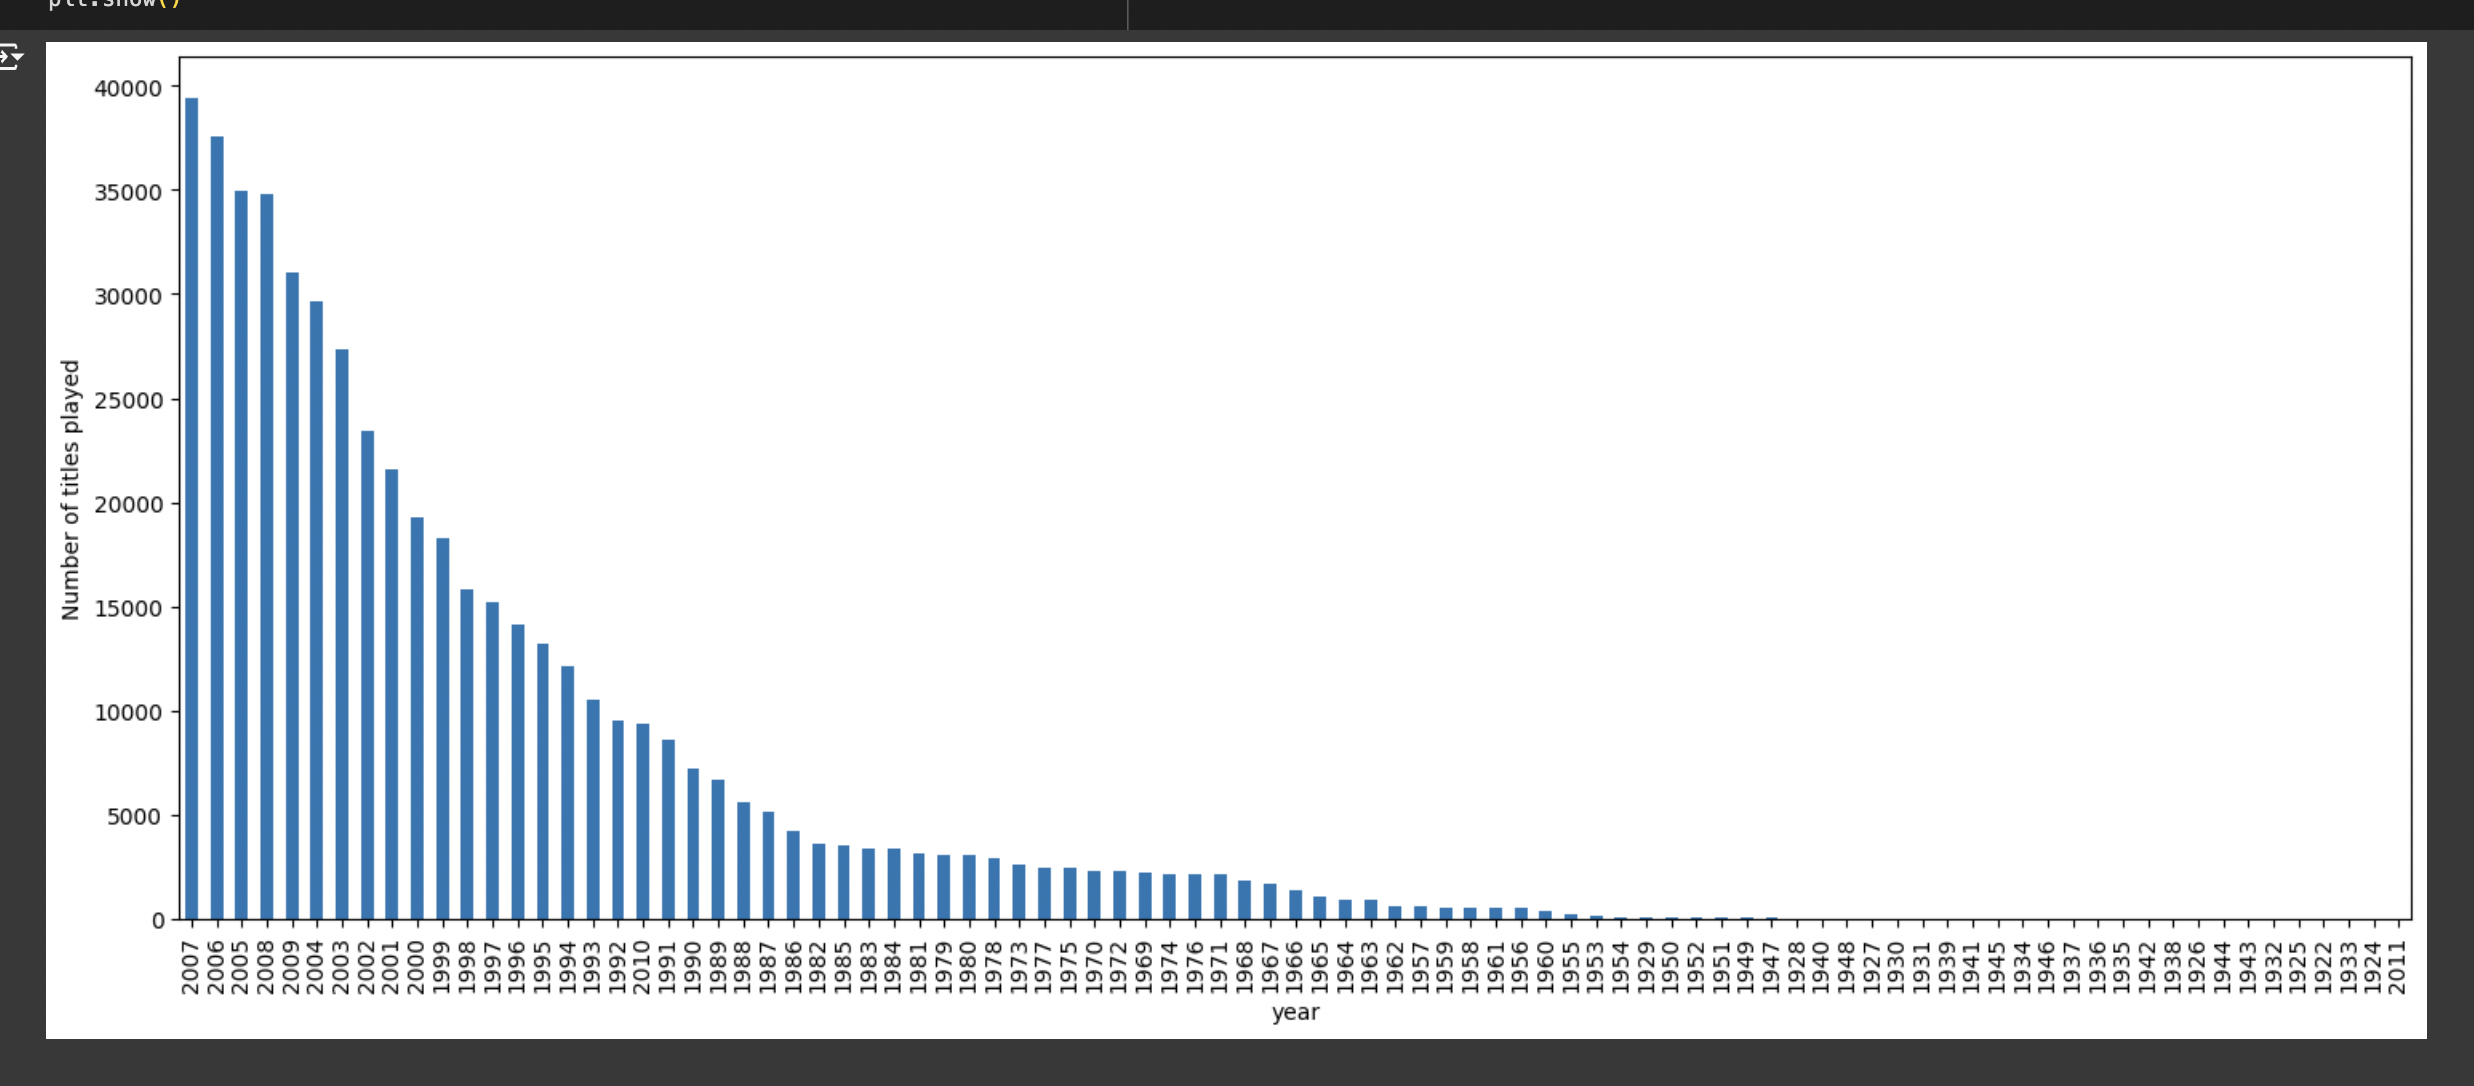










# Final proposed solution design



# *   The top n played songs would be displayed for users who are new and for whom we have no data on their choice/preference of songs.
# *   For users that have been using the system for sometime the recommendations will be based on the song preferences of similar users.  
# *  The recommendations based on preferences of similar users are about 50% accurate.  The best among the various other modeling techniques.
# *  As more user preference data is collected the recommendations can be more refined with increased accuracy.
# * Recommendations made will provide a list of songs to choose from thus keeping the users engaged on the site.
# * Personalized Recommendation Systems help users make decisions.
# * Personalized Recommendation systems are continuously improved with the availability of increased user data - on the songs being listened to and for how long did they listen to the song.



# Assumptions made

# * For the sake of simplicity we are assuming all songs are the same price for downlad.

# * The fee paid by the user to download the song and the revenue from the advertisements is used to pay for the purchase of the song and its distribution rights.



# Costs Associated

# * There will be a cost in collection of data of an optimum size to build the recommendation system.

# * Additional budget has to be planned for the following

# * Analyzing the data to ensure it includes the relevant fields with values for all the rows.

# * Train the model and choose the best performing one.

# * Ensure the best model is deployed for use.

# * Factor in the costs to fine-tune the model as additional user data becomes available.



# Disadvantages of user based collaborative filtering

# * Data sparsity is the key problem with the type of recommendation system selected.

# * The columns must be dropped/imputed with the right values for analysis.

# * For users with no data, popularity-based recommendations based on the  rating are used.



## BERT Based Recommendation System

# * Attempted to create a BERT based recommendation system

# * Here based off the songs that the user has listened to a similarity score is calculated for a new song from the new songs list.

# * If the score is above 60% the song is included on the recommendation list for the user.
